In [223]:
from math import *
import matplotlib.pyplot as plot

In [224]:
def RestrepoCuadrada(fc,fy,pl):
    Mcd=[]
    P=[]
    for Pi in range(0,12):
        P.append(Pi/10)
       
        xcf=0.34*(Pi/10)/(lam)+0.07
        
        Mcd.append(1.25*pl*(fy/fc)*(0.3+0.25*(0.5-xcf))+(Pi/10)*(0.5-xcf))
        
    return [Mcd,P]

In [225]:
t=10
lam=2.8/exp(6/(t+5))
fc=20.6*lam
fy=411.87*1.25

#Cuantias
pl=[]
val=5
for i in range(1,val):
    pl.append(i/100)

Resp=[]
for i in range(len(pl)):
    Resp.append(RestrepoCuadrada(fc,fy,pl[i]))

In [226]:
print(lam)

1.8768961288997899


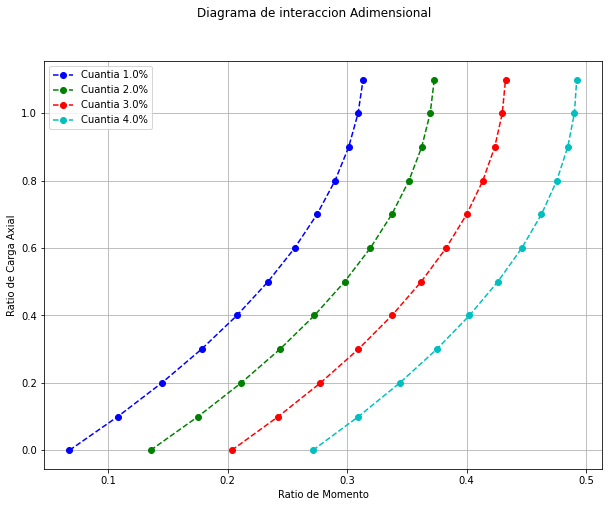

In [227]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

for k in range(len(Resp)):
    ax.plot(Resp[k][0],Resp[k][1], linestyle='--', marker='o', color=colors[k],label="Cuantia "+str(pl[k]*100)+"%") 
ax.legend()

ax.set_xlabel('Ratio de Momento')
ax.set_ylabel('Ratio de Carga Axial')

# Establecer título
plot.suptitle("Diagrama de interaccion Adimensional")

plot.grid(True)

# Mostrar
plot.show()

In [228]:
def ACI(b,h,fc,fy,r,d,ubica,aceros):
    #Como es simetrico los modelos de restrepo el centroide plastico es al medio de la seccion
    cp=h/2

    M=[]
    P=[]

    #M.append(0)
    #P.append(fy*sum(aceros))

    #falla balanceada
    cb=0.003*d/(0.002+0.003)

    for c in range(10,h-10,2):
        Paux=0.85*fc*0.85*c*b
        Maux=Paux*(cp-(0.85*c)*0.5)
        for i in range(len(ubica)):
            e=0.003*(ubica[i]/c-1)
            if(e>abs(0.002)):
                Paux=Paux+(e/abs(e))*4200*aceros[i]
                if ubica[i]>cp:
                    Maux=Maux+(e/abs(e))*4200*aceros[i]*(ubica[i]-cp)
                else:
                    Maux=Maux+(e/abs(e))*4200*aceros[i]*ubica[i]
            else:
                Paux=Paux+(e/abs(e))*(2*10**6)*e*aceros[i]
                if ubica[i]>cp:
                    Maux=Maux+(e/abs(e))*(2*10**6)*e*aceros[i]*(ubica[i]-cp)
                else:
                    Maux=Maux+(e/abs(e))*(2*10**6)*e*aceros[i]*ubica[i]    
        M.append(Maux)
        P.append(Paux)

    #M.append(0)
    #P.append(0.85*fc*b*h+fy*sum(aceros))
    return [M,P]

In [229]:
b=10
sal=80/(b-1)
u=5
for i in range(b-2):
    u=u+sal
    print(round(u,1),end=",")

13.9,22.8,31.7,40.6,49.4,58.3,67.2,76.1,

In [230]:
b=90
h=90
fc=210
fy=4200*1.15
r=5
d=h-r

ubica=[]
ubica.append([r,16.4,27.9,39.3,50.7,62.1,73.6,h-r])
ubica.append([r,15.0,25.0,35.0,45.0,55.0,65.0,75.0,h-r])
ubica.append([r,16.4,27.9,39.3,50.7,62.1,73.6,h-r])
ubica.append([r,15.0,25.0,35.0,45.0,55.0,65.0,75.0,h-r])
ubica.append([r,13.9,22.8,31.7,40.6,49.4,58.3,67.2,76.1,h-r])
ubica.append([r,15.0,25.0,35.0,45.0,55.0,65.0,75.0,h-r])

aceros=[]
aceros.append([8*2.84,2*2.84,2*2.84,2*2.84,2*2.84,2*2.84,2*2.84,8*2.84])
aceros.append([9*2.84,2*2.84,2*2.84,2*2.84,2*2.84,2*2.84,2*2.84,2*2.84,9*2.84])
aceros.append([8*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,8*5.1])
aceros.append([9*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,9*5.1])
aceros.append([10*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,2*5.1,10*5.1])
aceros.append([9*10,2*10,2*10,2*10,2*10,2*10,2*10,2*10,9*10])

In [231]:
resp=[]
for i in range(len(aceros)):
    resp.append(ACI(b,h,fc,fy,r,d,ubica[i],aceros[i]))

In [232]:
#Eliminando Dimensiones
for i in range(len(resp)):
    for j in range(len(resp[i][0])):
        resp[i][0][j]=resp[i][0][j]/(b*h*h*fc)
        resp[i][1][j]=resp[i][1][j]/(b*h*fc)

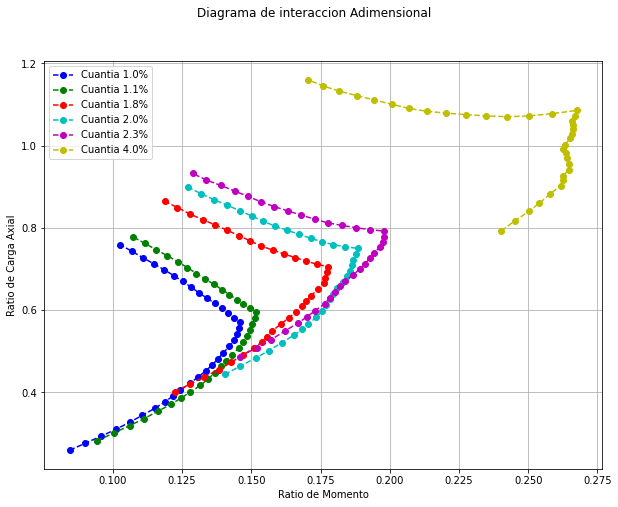

In [233]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

for i in range(len(resp)):
    ax.plot(resp[i][0],resp[i][1], linestyle='--', marker='o', color=colors[i],label="Cuantia "+str( round((sum(aceros[i])*100)/(b*h),1) )+"%") 
ax.legend()

ax.set_xlabel('Ratio de Momento')
ax.set_ylabel('Ratio de Carga Axial')

# Establecer título
plot.suptitle("Diagrama de interaccion Adimensional")

plot.grid(True)

# Mostrar
plot.show()

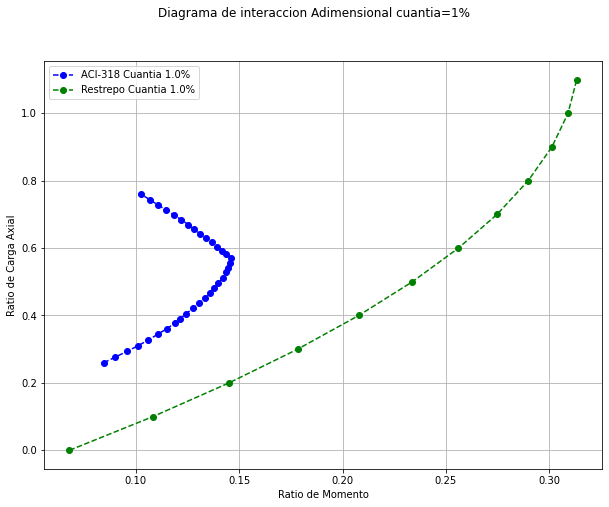

In [234]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

ax.plot(resp[0][0],resp[0][1], linestyle='--', marker='o', color=colors[0],label="ACI-318 Cuantia "+str( round((sum(aceros[0])*100)/(b*h),1) )+"%") 
ax.plot(Resp[0][0],Resp[0][1], linestyle='--', marker='o', color=colors[1],label="Restrepo Cuantia "+str(pl[0]*100)+"%")
ax.legend()

ax.set_xlabel('Ratio de Momento')
ax.set_ylabel('Ratio de Carga Axial')

# Establecer título
plot.suptitle("Diagrama de interaccion Adimensional cuantia=1%")

plot.grid(True)

# Mostrar
plot.show()

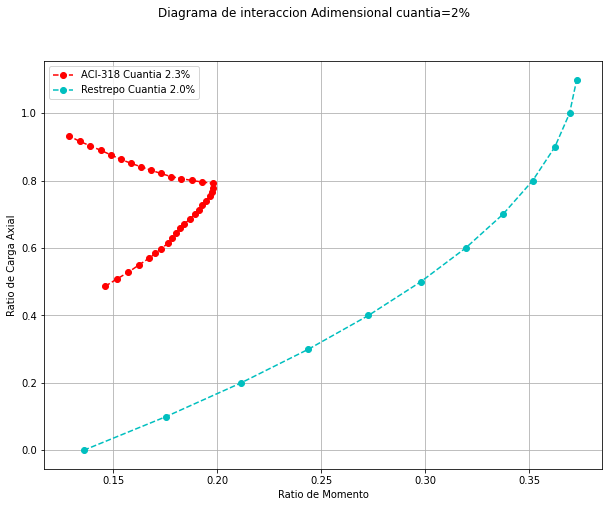

In [235]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

ax.plot(resp[4][0],resp[4][1], linestyle='--', marker='o', color=colors[2],label="ACI-318 Cuantia "+str( round((sum(aceros[4])*100)/(b*h),1) )+"%") 
ax.plot(Resp[1][0],Resp[1][1], linestyle='--', marker='o', color=colors[3],label="Restrepo Cuantia "+str(pl[1]*100)+"%")
ax.legend()

ax.set_xlabel('Ratio de Momento')
ax.set_ylabel('Ratio de Carga Axial')

# Establecer título
plot.suptitle("Diagrama de interaccion Adimensional cuantia=2%")

plot.grid(True)

# Mostrar
plot.show()

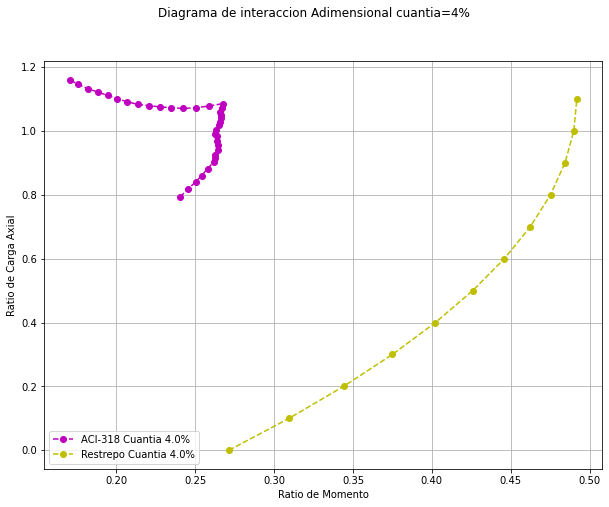

In [236]:
fig, ax = plot.subplots(nrows=1, ncols=1, figsize=(10,7.5))

colors=["b","g","r","c","m","y","k","greenyellow","lime","orange"]

ax.plot(resp[5][0],resp[5][1], linestyle='--', marker='o', color=colors[4],label="ACI-318 Cuantia "+str( round((sum(aceros[5])*100)/(b*h),1) )+"%") 
ax.plot(Resp[3][0],Resp[3][1], linestyle='--', marker='o', color=colors[5],label="Restrepo Cuantia "+str(pl[3]*100)+"%")
ax.legend()

ax.set_xlabel('Ratio de Momento')
ax.set_ylabel('Ratio de Carga Axial')

# Establecer título
plot.suptitle("Diagrama de interaccion Adimensional cuantia=4%")

plot.grid(True)

# Mostrar
plot.show()